### Old Car Price Prediction

Introduction About the Data : The dataset The goal is to predict price of given old car (Regression Analysis).

There are 7 independent variables
- `name` :- Name of car or model of car
- `year` :- car purchase year how old it is.
- `km_driven` :- How many Km the car was running.
- `fuel` :- car fuel type eg petrol or diesel
- `seller_type` :- different types of sellers that can be involved in a transaction
- `transmission` :- In the context of automobiles, "transmission" generally refers to the mechanism that transfers power from the engine to the wheels, enabling the car to move
- `owner` :- The car owner can be an individual, such as a private individual who purchased the car for personal use.

Target variable

- `selling_price` :- Price of the given old car

Dataset Source Link :- https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

- No Missing Value here

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.duplicated().sum()

763

In [7]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


- we have a 763 Duplicated Record so let's drop this duplicated records 

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
# segregate numerical and categorical columns
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']
print("Numerical Columns :- ",numerical_columns)
print("Categorical Columns :- ",categorical_columns)

Numerical Columns :-  Index(['year', 'selling_price', 'km_driven'], dtype='object')
Categorical Columns :-  Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [11]:
df[categorical_columns].describe()

,name,fuel,seller_type,transmission,owner
count,3577,3577,3577,3577,3577
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,54,1800,2832,3265,2218


In [12]:
df['name'].value_counts()

name
Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: count, Length: 1491, dtype: int64

- I thing we have to preform Target encoding here so Let's do that 

In [13]:
import category_encoders as ce

In [14]:
encoder = ce.TargetEncoder()
encoder.fit(df['name'],df['selling_price'])
df['name_encoded'] = encoder.transform(df['name'])

In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_encoded
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,286581.271037
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,299890.356502
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,476825.699092
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,427957.228148
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,483323.938246


In [16]:
categorical_columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [17]:
df['fuel'].value_counts()

fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

In [18]:
df['seller_type'].value_counts()

seller_type
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64

In [19]:
df['transmission'].value_counts()

transmission
Manual       3265
Automatic     312
Name: count, dtype: int64

In [20]:
df['owner'].value_counts()

owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

In [21]:
numerical_columns

Index(['year', 'selling_price', 'km_driven'], dtype='object')

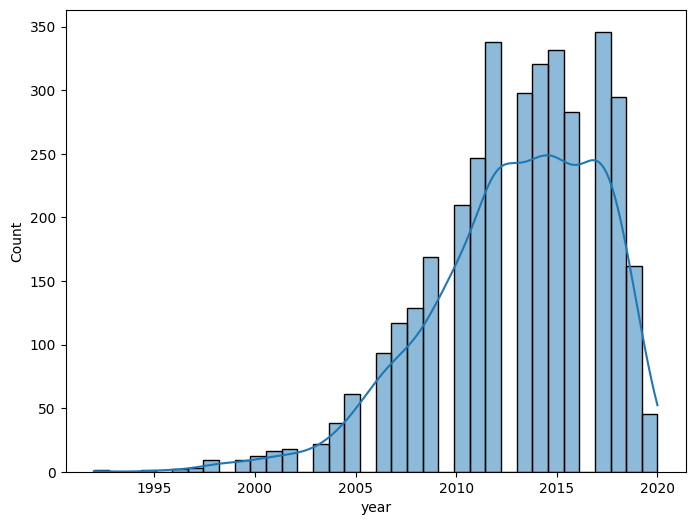

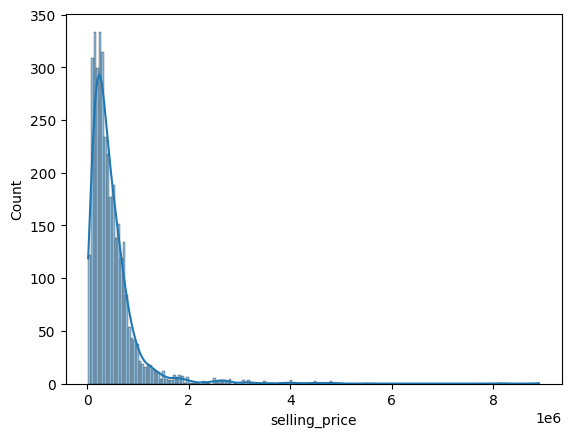

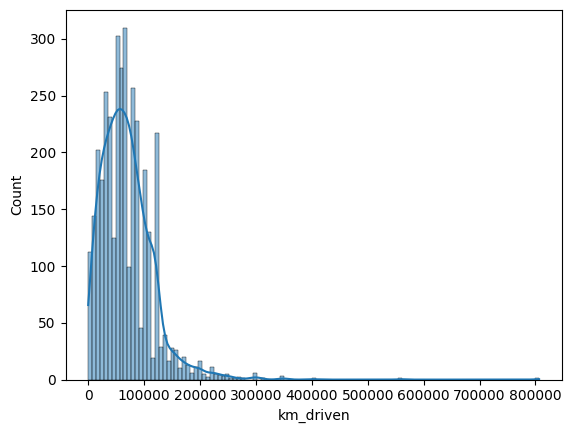

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

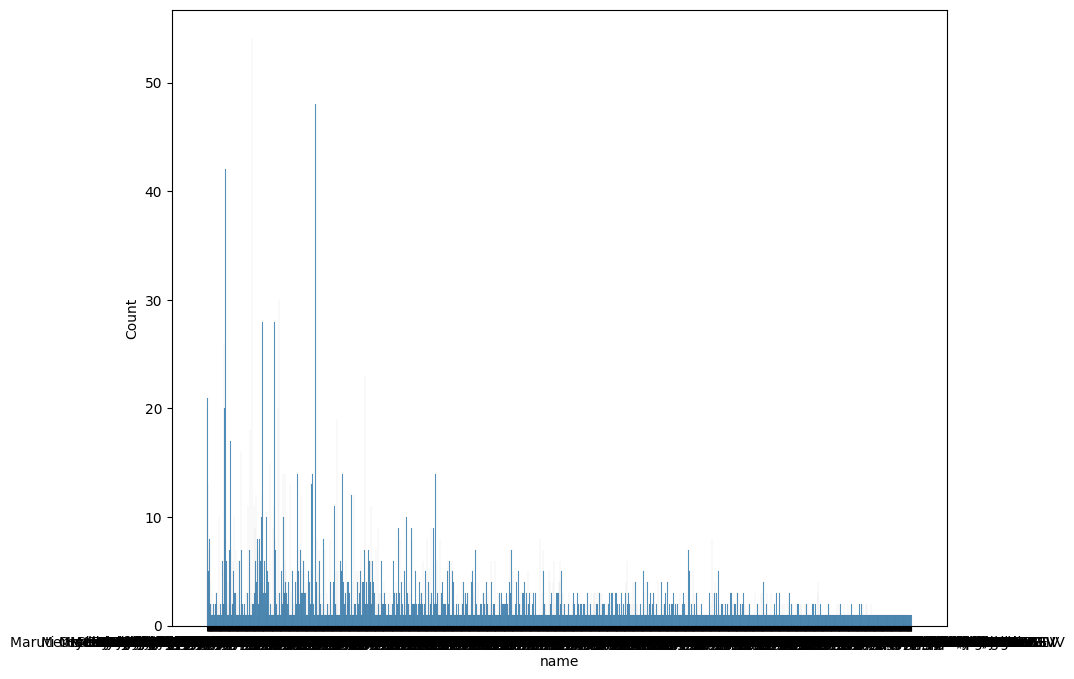

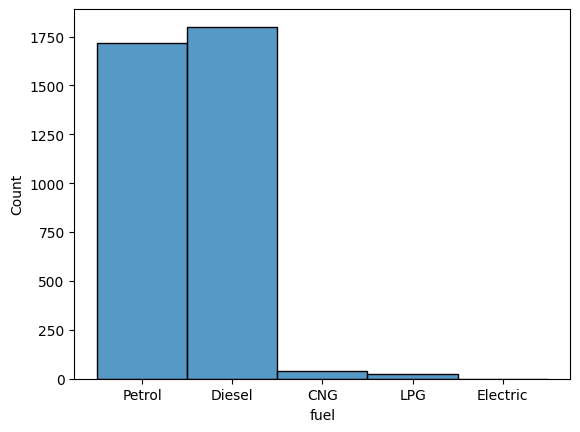

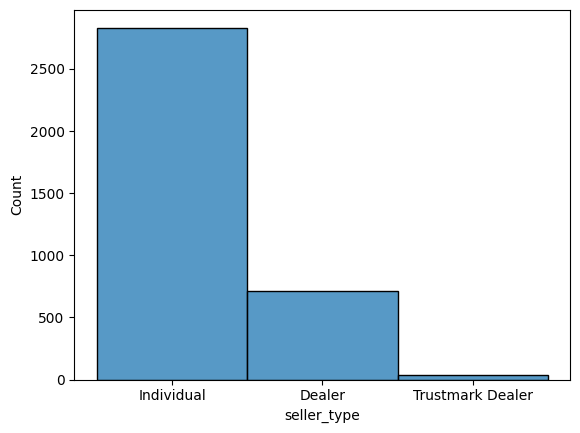

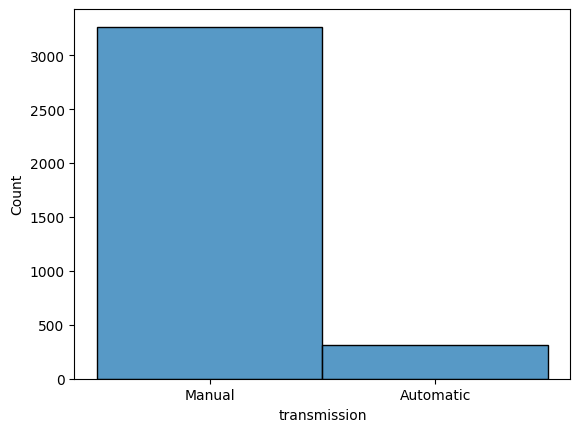

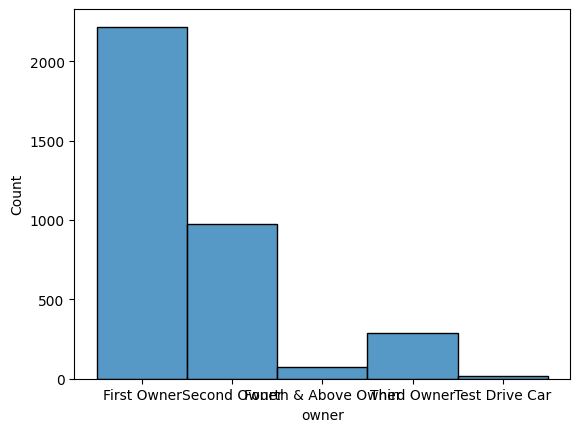

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i)
    print('\n')
    plt.show()